# Fuzzy System
Simple application of fuzzy system on restaurant rating assistance using Mamdani Center of Gravity

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
!gdown --id 1K9VJ0WydlUy5XCvnGYX2KijPQZoo4TQ5

Downloading...
From: https://drive.google.com/uc?id=1K9VJ0WydlUy5XCvnGYX2KijPQZoo4TQ5
To: /content/restoranFuzzy.xlsx
100% 10.5k/10.5k [00:00<00:00, 15.8MB/s]


## Load Datasets

In [ ]:
df = pd.read_excel("restoranFuzzy.xlsx")
df.set_index('id', inplace=True)

In [ ]:
df.sample(5)

,pelayanan,makanan
id,,
90,10,1
91,98,3
80,39,10
54,64,10
27,59,8


In [ ]:
df.max()

pelayanan    100
makanan       10
dtype: int64

In [ ]:
df.min()

pelayanan    3
makanan      1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


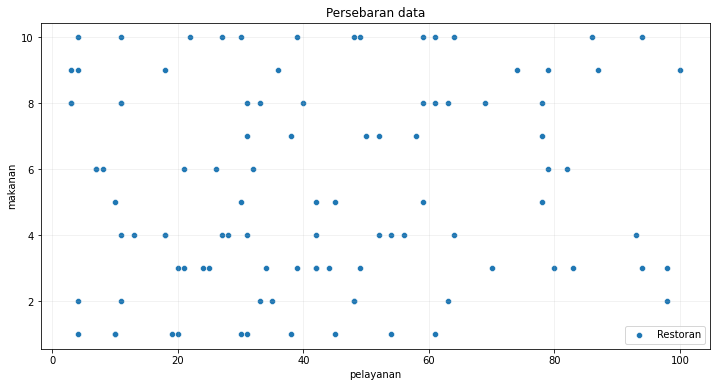

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,6))

ax = sns.scatterplot(df.pelayanan, df.makanan, label="Restoran")
ax.set_title("Persebaran data")
ax.grid(alpha=0.2)

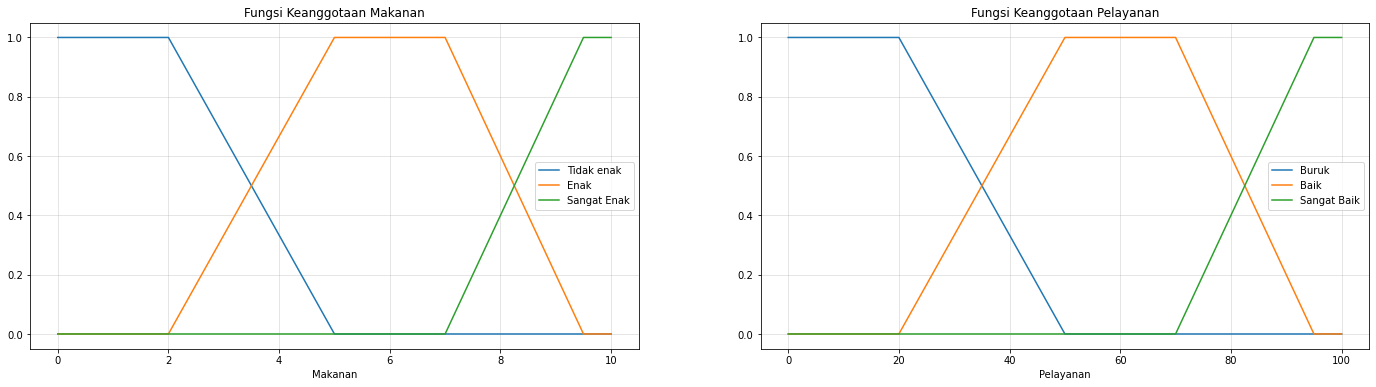

In [ ]:
# fungsi keanggotaan makanan
nm = [0.00, 2.00, 5.00, 7.00, 9.50, 10.00]

def tidakEnakFunc(x):
    if (x <= nm[1]):
        return 1
    elif (x > nm[2]):
        return 0
    elif (x > nm[1] and x <= nm[2]):
        return (nm[2]-x)/(nm[2]-nm[1])
    
def enakFunc(x):
    if (x <= nm[1] or x > nm[4]):
        return 0
    elif (x > nm[1] and x <= nm[2]):
        return (x-nm[1])/(nm[2]-nm[1])
    elif (x > nm[2] and x <= nm[3]):
        return 1
    elif (x > nm[3] and x <= nm[4]):
        return (nm[4]-x)/(nm[4]-nm[3])
    
def sangatEnakFunc(x):
    if (x <= nm[3]):
        return 0
    elif (x > nm[4]):
        return 1
    elif (x > nm[3] and x <= h[4]):
        return (x-nm[3])/(nm[4]-nm[3])

# fungsi keanggotaan penilaian
pn = [0.00, 20.00, 50.00, 70.00, 95.00, 100.00]

def burukFunc(x):
    if (x <= pn[1]):
        return 1
    elif (x > pn[2]):
        return 0
    elif (x > pn[1] and x <= pn[2]):
        return (pn[2]-x)/(pn[2]-pn[1])
    
def baikFunc(x):
    if (x <= pn[1] or x > pn[4]):
        return 0
    elif (x > pn[1] and x <= l[2]):
        return (x-pn[1])/(pn[2]-pn[1])
    elif (x > pn[2] and x <= pn[3]):
        return 1
    elif (x > pn[3] and x <= pn[4]):
        return (pn[4]-x)/(pn[4]-pn[3])
    
def sangatBaikFunc(x):
    if (x <= pn[3]):
        return 0
    elif (x > pn[4]):
        return 1
    elif (x > pn[3] and x <= pn[4]):
        return (x-pn[3])/(pn[4]-pn[3])
    
#plot untuk penghasilan function    

x1 = [0.00, 2.00, 5.00, 10.00]
y1 = [1,1,0,0]

x2 = [0.00, 2.00, 5.00, 7.00, 9.50, 10.00]
y2 = [0,0,1,1,0,0]

x3 = [0.00, 7.00, 9.50, 10.00]
y3 = [0,0,1,1]

p1 = [0.00, 20.00, 50.00, 100.00]
q1 = [1,1,0,0]

p2 = [0.00, 20.00, 50.00, 70.00, 95.00, 100.00]
q2 = [0,0,1,1,0,0]

p3 = [0.00, 70.00, 95.00, 100.00]
q3 = [0,0,1,1]

fig, ax = plt.subplots(1, 2, figsize=(24,6))
ax[0].plot(x1, y1, label="Tidak enak")
ax[0].plot(x2, y2, label="Enak")
ax[0].plot(x3, y3, label="Sangat Enak")

ax[1].plot(p1, q1, label="Buruk")
ax[1].plot(p2, q2, label="Baik")
ax[1].plot(p3, q3, label="Sangat Baik")

ax[0].set_title("Fungsi Keanggotaan Makanan")
ax[0].set_xlabel("Makanan")


ax[1].set_title("Fungsi Keanggotaan Pelayanan")
ax[1].set_xlabel("Pelayanan")

ax[0].legend()
ax[0].grid(alpha=0.4)

ax[1].legend()
ax[1].grid(alpha=0.4)

plt.show()

## Fuzzification

In [ ]:
def to_fuzzy_input_makanan(row) : 
    Makanan = row.makanan
    tidak_enak, enak, sangat_enak = 0, 0, 0

    # single rule 
    if Makanan <= nm[1] : 
        tidak_enak = 1

    elif nm[1] <= Makanan <= nm[3] : 
        enak = 1
    
    elif Makanan >= nm[3] : 
        sangat_enak = 1 

    if nm[1] < Makanan < nm[2] : 
        tidak_enak = -(Makanan - nm[2]) / (nm[2] - nm[1]) 
        enak = (Makanan - nm[1]) / (nm[2] - nm[1]) 

    elif (nm[3] < Makanan < nm[4]) : 
        enak = -(Makanan - nm[4]) / (nm[4] - nm[3])
        sangat_enak = (Makanan - nm[3]) / (nm[4] - nm[3])

    row['tidak_enak'] = tidak_enak 
    row['enak'] = enak
    row['sangat_enak'] = sangat_enak

    return row

def to_fuzzy_input_pelayanan(row) : 
    Pelayanan = row.pelayanan
    buruk, baik, sangat_baik = 0, 0, 0

    # single rule 
    if Pelayanan <= pn[1] : 
        buruk = 1

    elif pn[1] <= Pelayanan <= pn[3] : 
        baik = 1
    
    elif Pelayanan >= pn[3] : 
        sangat_baik = 1 

    if pn[1] < Pelayanan < pn[2] : 
        buruk = -(Pelayanan - pn[2]) / (pn[2] - pn[1]) 
        baik = (Pelayanan - pn[1]) / (pn[2] - pn[1]) 

    elif (pn[3] < Pelayanan < pn[4]) : 
        baik = -(Pelayanan - pn[4]) / (pn[4] - pn[3])
        sangat_baik = (Pelayanan - pn[3]) / (pn[4] - pn[3])

    row['buruk'] = buruk 
    row['baik'] = baik
    row['sangat_baik'] = sangat_baik

    return row

## Inference

In [ ]:
disp = pd.DataFrame({
    "Makanan/Penilaian" : ["Tidak Enak", "Enak", "Sangat Enak"],
    "Buruk" : ["Not Reccomended", "Consideration", "Consideration"],
    "Baik" : ["Consideration", "Reccomended", "Reccomended"],
    "Sangat Baik" : ["Consideration", "Reccomended", "Highly Reccomended"],
})
disp.set_index("Makanan/Penilaian")

,Buruk,Baik,Sangat Baik
Makanan/Penilaian,,,
Tidak Enak,Not Reccomended,Consideration,Consideration
Enak,Consideration,Reccomended,Reccomended
Sangat Enak,Consideration,Reccomended,Highly Reccomended


In [ ]:
def inference(row) : 

    nrec = []
    cons = []
    reco = []
    hrec = []

    if row.tidak_enak != 0 and row.buruk != 0 : 
        nrec.append(min(row.tidak_enak, row.buruk))
    if row.tidak_enak != 0 and row.baik != 0 : 
        cons.append(min(row.tidak_enak, row.baik))
    if row.tidak_enak != 0 and row.sangat_baik != 0 : 
        cons.append(min(row.tidak_enak, row.sangat_baik)) 


    if row.enak != 0 and row.buruk != 0 : 
        cons.append(min(row.enak, row.buruk))
    if row.enak != 0 and row.baik != 0 : 
        reco.append(min(row.enak, row.baik))
    if row.enak != 0 and row.sangat_baik != 0 : 
        reco.append(min(row.enak, row.sangat_baik)) 


    if row.sangat_enak != 0 and row.buruk != 0 : 
        cons.append(min(row.sangat_enak, row.buruk))
    if row.sangat_enak != 0 and row.baik != 0 : 
        reco.append(min(row.sangat_enak, row.baik))
    if row.sangat_enak != 0 and row.sangat_baik != 0 : 
        hrec.append(min(row.sangat_enak, row.sangat_baik))  
    
    nrec = 0 if not nrec else max(nrec)
    cons = 0 if not cons else max(cons)
    reco = 0 if not reco else max(reco)
    hrec = 0 if not hrec else max(hrec)

    row['nrec'] = nrec
    row['cons'] = cons
    row['reco'] = reco
    row['hrec'] = hrec

    return row

In [ ]:
# Fuzzification apply
df = df.apply(lambda x : to_fuzzy_input_makanan(x), axis=1)
df = df.apply(lambda x : to_fuzzy_input_pelayanan(x), axis=1)


# Inference apply
df = df.apply(lambda x : inference(x), axis=1)

In [ ]:
df.sample(5)

,pelayanan,makanan,tidak_enak,enak,sangat_enak,buruk,baik,sangat_baik,nrec,cons,reco,hrec
id,,,,,,,,,,,,
31,74.0,9.0,0.000000,0.200000,0.8,0.0,0.84,0.16,0.000000,0.000000,0.800000,0.16
78,20.0,1.0,1.000000,0.000000,0.0,1.0,0.00,0.00,1.000000,0.000000,0.000000,0.00
23,18.0,4.0,0.333333,0.666667,0.0,1.0,0.00,0.00,0.333333,0.666667,0.000000,0.00
28,44.0,3.0,0.666667,0.333333,0.0,0.2,0.80,0.00,0.200000,0.666667,0.333333,0.00
79,87.0,9.0,0.000000,0.200000,0.8,0.0,0.32,0.68,0.000000,0.000000,0.320000,0.68


## Defuzzification - Mamdani

In [ ]:
import random
random.seed = 42 # the answer of life :)
n = np.random.randint(0, 100, size=(10))
df_m = pd.DataFrame({'z' : sorted(n)})

In [ ]:
df.loc[(df['hrec'] > 0)].head()

,pelayanan,makanan,tidak_enak,enak,sangat_enak,buruk,baik,sangat_baik,nrec,cons,reco,hrec,score
id,,,,,,,,,,,,,
42,94.0,10.0,0.0,0.0,1.0,0.0,0.04,0.96,0.0,0.0,0.04,0.96,94.673077
24,100.0,9.0,0.0,0.2,0.8,0.0,0.00,1.00,0.0,0.0,0.20,0.80,89.782609
79,87.0,9.0,0.0,0.2,0.8,0.0,0.32,0.68,0.0,0.0,0.32,0.68,87.165289
69,86.0,10.0,0.0,0.0,1.0,0.0,0.36,0.64,0.0,0.0,0.36,0.64,86.349593
22,79.0,9.0,0.0,0.2,0.8,0.0,0.64,0.36,0.0,0.0,0.64,0.36,81.306569


In [ ]:
def get_base_mamdani_dataframe(row) : 
    z = row.z
    reject = 0
    acc = 0

    kecil, sedang, besar, sangat_besar = 0, 0, 0, 0

    # single rule
    if z <= 40 : 
        kecil = 1

    elif z >= 90 : 
        sangat_besar = 1

    elif 50 <= z <= 60: 
        sedang = 1
    
    elif 70 <= z <= 80: 
        besar = 1

    # Multiple intersection rule 
    if 40 < z < 50 : 
        kecil = -(z - 50) / (50 - 40)
        sedang = (z - 40) / (50 - 40)
    
    elif 60 < z < 70 : 
        sedang = -(z - 70) / (70 - 60)
        besar =   (z - 60  ) / (70 - 60)

    elif 80 < z < 90 : 
        sedang = -(z - 90 ) / (90 - 80)
        sangat_besar = (z - 80) / (90 - 80)

    row['nrec'] = kecil
    row['cons'] = sedang
    row['reco'] = besar 
    row['hrec'] = sangat_besar


    return row   

def get_mamdani_matrix(row, df_m) :

    # helper function
    def get_membership_vector(row, nrec, cons, reco, hrec) : 
        nrec = min(row.nrec, nrec)
        cons  = min(row.cons, cons)
        reco  = min(row.reco, reco)
        hrec = min(row.hrec, hrec)

        return max(nrec, cons, reco, hrec)
        

    nrec = row.nrec
    cons = row.cons
    reco = row.reco
    hrec = row.hrec

    matrix = df_m.apply(lambda x : get_membership_vector(x, nrec, cons, reco, hrec), axis=1)
    return matrix

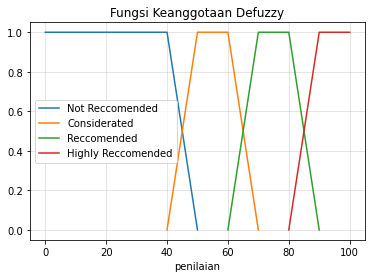

In [ ]:
x1 = [0, 40, 50]
y1 = [1, 1, 0]

x2 = [40, 50, 60, 70]
y2 = [0, 1, 1, 0]

x3 = [60, 70, 80, 90]
y3 = [0, 1, 1, 0]

x4 = [80, 90, 100]
y4 = [0, 1, 1]

plt.plot(x1, y1, label='Not Reccomended')
plt.plot(x2, y2, label='Considerated')
plt.plot(x3, y3, label='Reccomended')
plt.plot(x4, y4, label='Highly Reccomended')
plt.title('Fungsi Keanggotaan Defuzzy')
plt.xlabel("penilaian")
plt.legend()
plt.grid(alpha=0.4)

In [ ]:
# Mamdani membership dataframe
df_m = df_m.apply(lambda x : get_base_mamdani_dataframe(x), axis=1)
df_m

,z,nrec,cons,reco,hrec
0,12.0,1.0,0.0,0.0,0.0
1,18.0,1.0,0.0,0.0,0.0
2,20.0,1.0,0.0,0.0,0.0
3,69.0,0.0,0.1,0.9,0.0
4,70.0,0.0,0.0,1.0,0.0
5,75.0,0.0,0.0,1.0,0.0
6,80.0,0.0,0.0,1.0,0.0
7,92.0,0.0,0.0,0.0,1.0
8,94.0,0.0,0.0,0.0,1.0
9,97.0,0.0,0.0,0.0,1.0


### Defuzzification Mamdani
#### Center of Gravity

In [ ]:
matrix = df.apply(lambda x : get_mamdani_matrix(x, df_m), axis=1)

# dot product (100x10) (10x1) => (100x1) 
top_dot =  matrix @ df_m['z']
bot_sum = matrix.sum(axis=1)

df['score'] = top_dot / bot_sum
df.sort_values('score',ascending=False, inplace=True)

## Submission

In [ ]:
sub = df[:10]
sub.reset_index(inplace=True)
sub.id.to_excel("peringkat.xls", index=False)

## Result Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


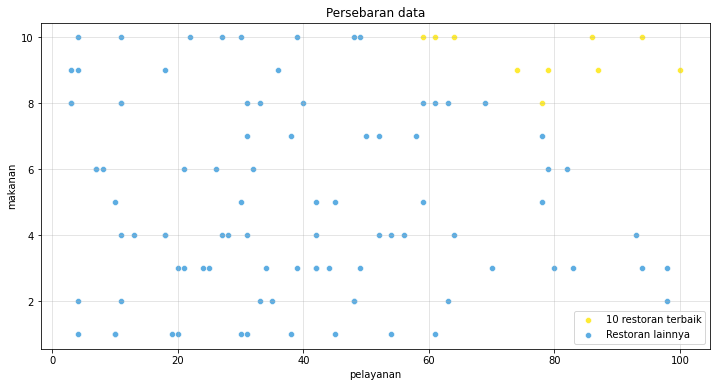

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,6))

df_best = df.iloc[:10]
df_rest = df.iloc[10:]

ax = sns.scatterplot(df_best.pelayanan, df_best.makanan, label="10 restoran terbaik", color='#FEEB34')
ax = sns.scatterplot(df_rest.pelayanan, df_rest.makanan, label="Restoran lainnya", color='#5DADE2')
ax.set_title("Persebaran data")
ax.grid(alpha=0.4)